In [1]:
import torch
import torch.nn as nn
import numpy as np
from tree import sample_tree_from_logits
import matplotlib.pyplot as plt

In [2]:
n = 6
#adj = torch.randn(n*(n-1)//2).cuda().flatten()
adj = torch.randn((n-1)**2).cuda()
adj_in = nn.Parameter(adj, requires_grad=True)

In [3]:
u_vertices = torch.triu_indices(n, n, offset=1)
l_vertices = torch.triu_indices(n-2, n-2)

adj_sq = torch.zeros((n,n)).cuda()
adj_sq[u_vertices[0], u_vertices[1]] = torch.exp(adj[:n*(n-1)//2])
adj_sq[l_vertices[1]+2, l_vertices[0]+1] = torch.exp(adj[n*(n-1)//2:])

#plt.imshow(adj_sq.cpu().detach().numpy())

In [4]:
S_soft = sample_tree_from_logits(adj_in, 0.08, False, np.inf, "cuda")
S_hard = sample_tree_from_logits(adj_in, 0.1, True, np.inf, "cuda")


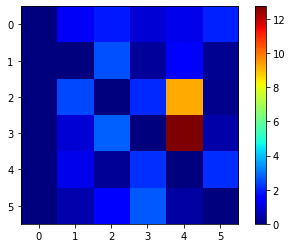

In [5]:
plt.imshow(adj_sq.cpu().detach().numpy(), cmap="jet")
plt.colorbar()

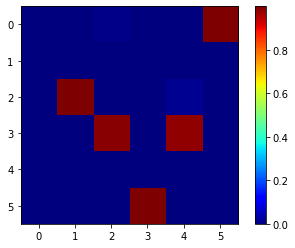

In [6]:
plt.imshow(S_soft.cpu().detach().numpy(), cmap="jet")
plt.colorbar()

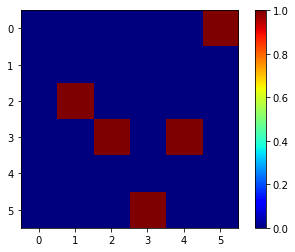

In [7]:
plt.imshow(S_hard.cpu().detach().numpy(), cmap="jet")
plt.colorbar()